<a href="https://colab.research.google.com/github/pfauda/python/blob/gh-pages/cll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Graficador de activos en CCL de Galicia

In [2]:
# Instalación de librerias

In [3]:
!pip install yfinance

In [4]:
# Importar las librerias de python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from google.colab import files

In [27]:
# Cargar datos historicos
import yfinance as yf
import datetime as dt
start = "2002-01-01"
end = "2003-12-12"
#end = dt.date.today().strftime("%Y-%m-%d")
df_ggal_adr = yf.download("GGAL", start=start, end=end)
df_ggal_adr.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis=1, inplace=True)

df_ggal_local = yf.download("GGAL.BA", start=start, end=end)
df_ggal_local.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis=1, inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
# Calcular el CCL de galicia y limpiar al dataframe
df_ccl_ggal = ( df_ggal_local / df_ggal_adr ) * 10
del df_ggal_adr
del df_ggal_local
df_ccl_ggal.dropna(inplace=True)

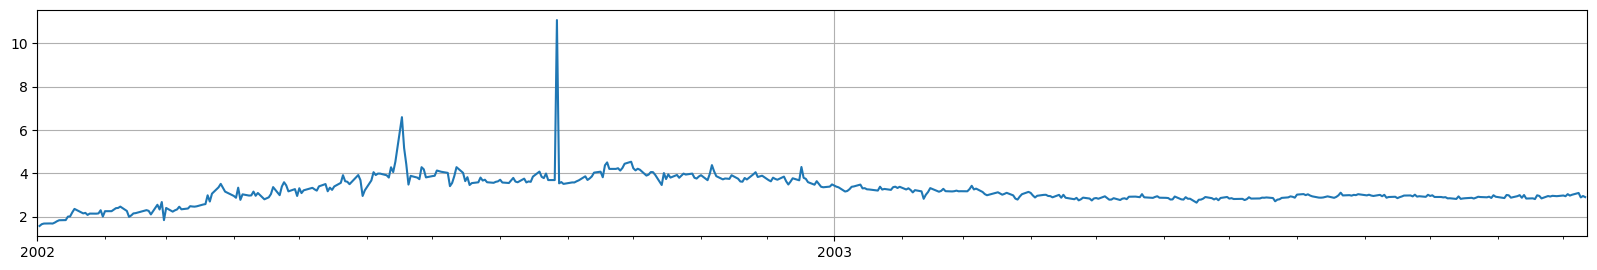

In [29]:
# Graficar la serie
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot(df_ccl_ggal)
# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim(np.datetime64(start), np.datetime64(end))
ax.grid(True)
plt.rcParams['figure.figsize'] = [20, 3]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.show()

In [25]:
def plot_ticker(ticker):
  # Graficar el ticker local en CCL
  df_ticker_local = yf.download(ticker, start=start, end=end)
  if not df_ticker_local.empty:
    df_ticker_local.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis=1, inplace=True)
    # Calcular el ticker en CCL
    df_ticker_ccl = df_ticker_local / df_ccl_ggal
    df_ticker_ccl.dropna(inplace=True)
    # Graficar la serie
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    years_fmt = mdates.DateFormatter('%Y')

    fig, ax = plt.subplots()
    ax.plot(df_ticker_ccl)
    # format the ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    ax.set_xlim(np.datetime64(start), np.datetime64(end))
    ax.grid(True)
    plt.rcParams['figure.figsize'] = [20, 3]
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but 
    plt.title(ticker)
    #plt.savefig(ticker+".png")
    plt.show()

[*********************100%***********************]  1 of 1 completed


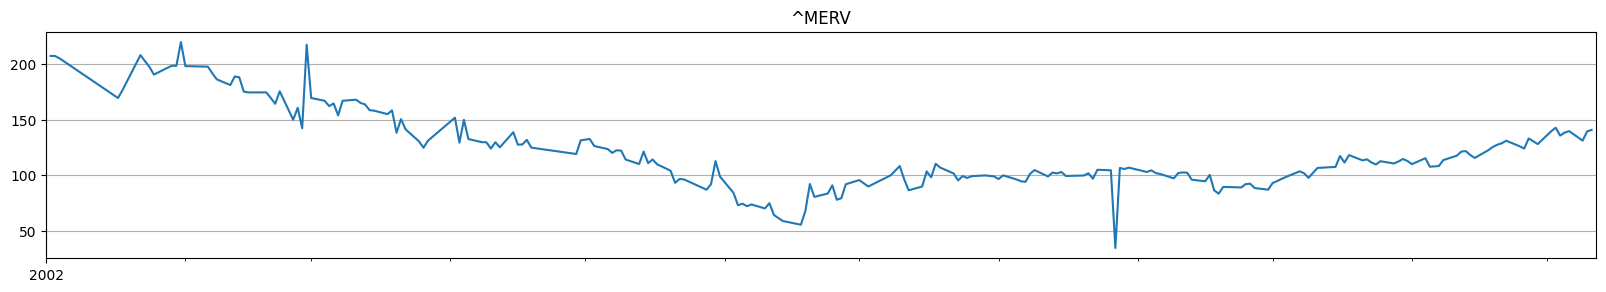

[*********************100%***********************]  1 of 1 completed


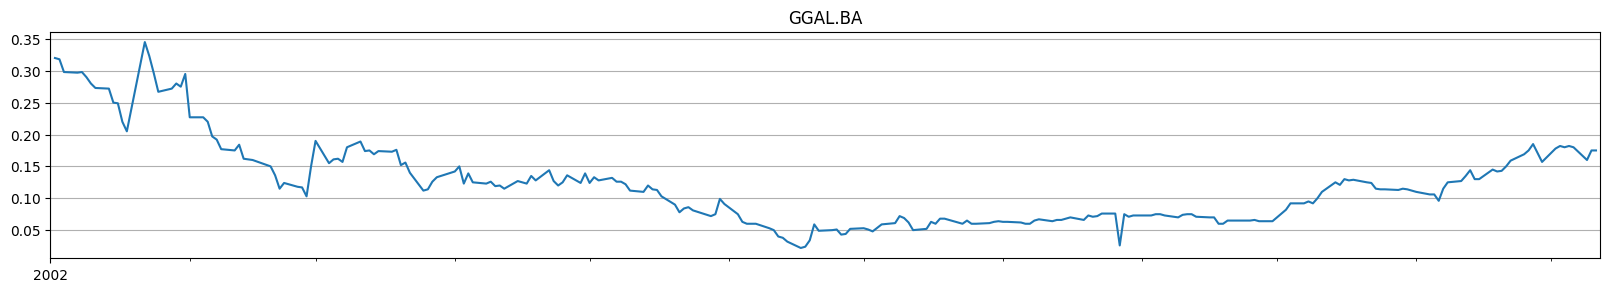

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BBAR.BA: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


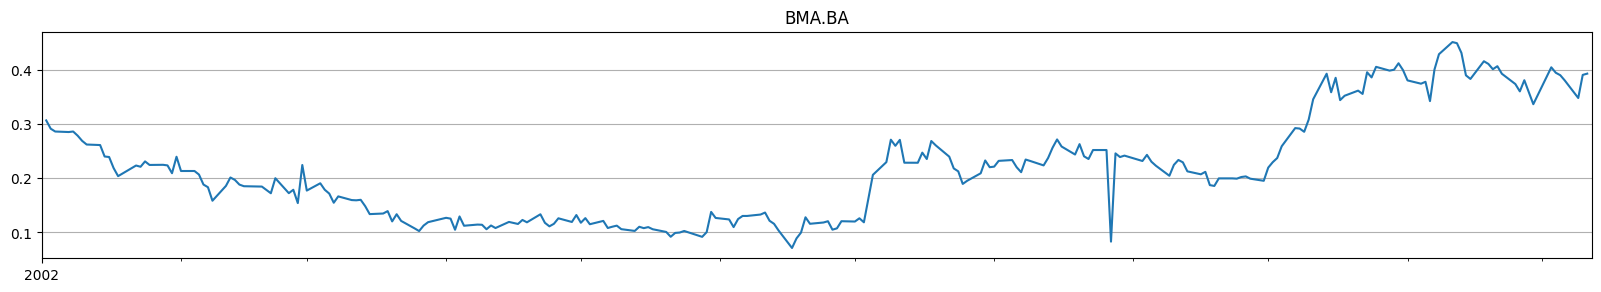

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SUPV.BA: Data doesn't exist for startDate = 1009843200, endDate = 1039651200
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BYMA.BA: Data doesn't exist for startDate = 1009843200, endDate = 1039651200
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VALO.BA: Data doesn't exist for startDate = 1009843200, endDate = 1039651200
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CVH.BA: Data doesn't exist for startDate = 1009843200, endDate = 1039651200
[*********************100%***********************]  1 of 1 completed


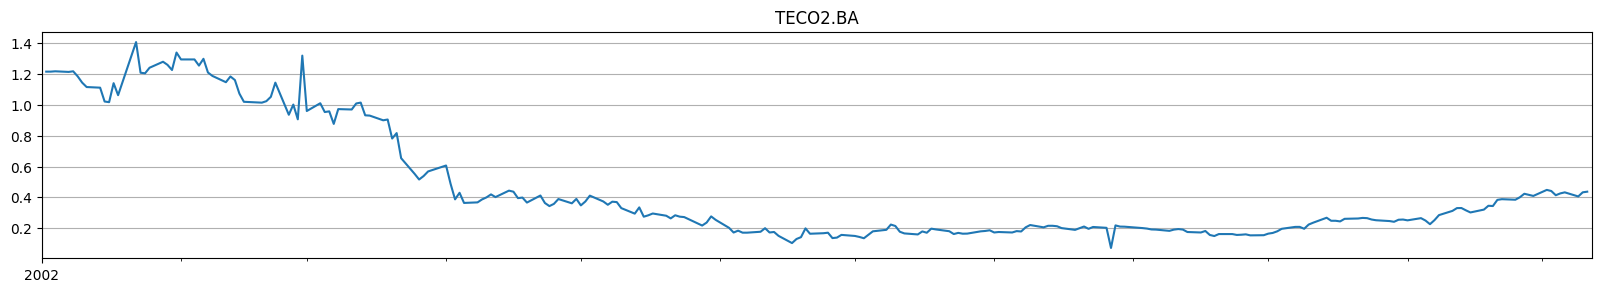

[*********************100%***********************]  1 of 1 completed


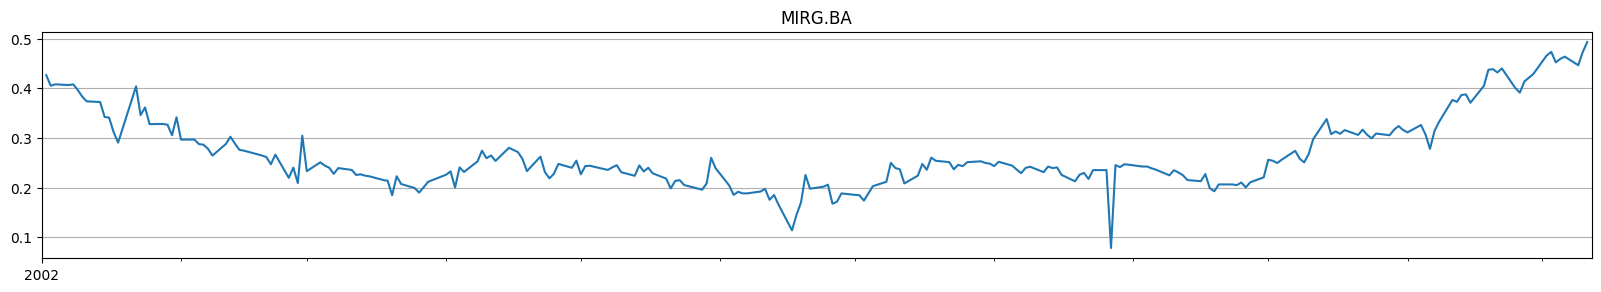

[*********************100%***********************]  1 of 1 completed


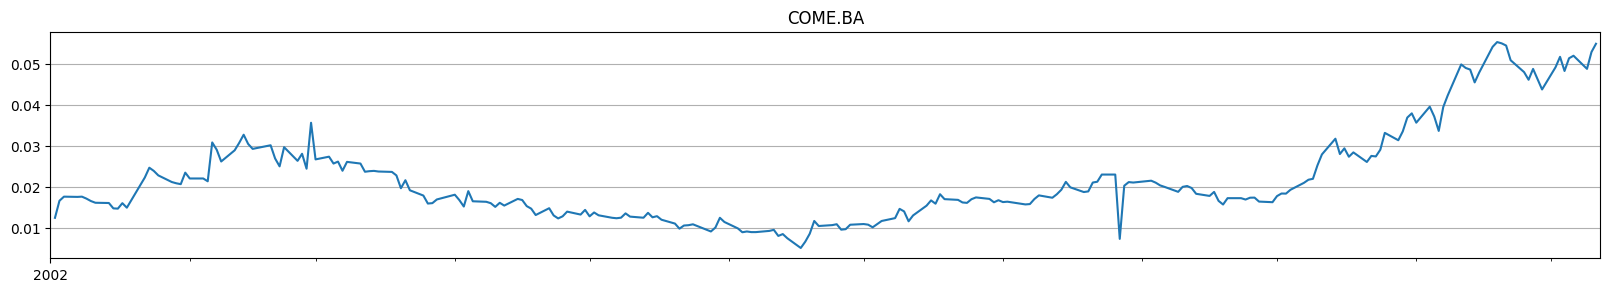

[*********************100%***********************]  1 of 1 completed


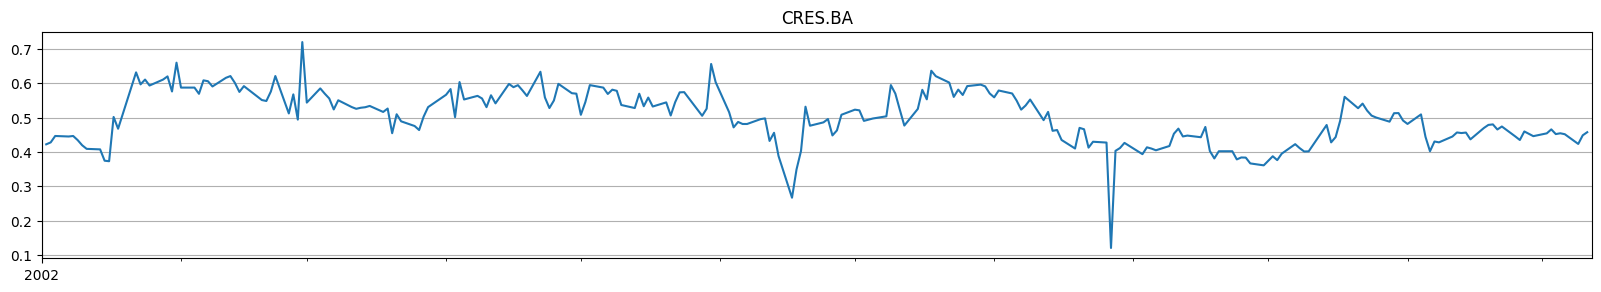

[*********************100%***********************]  1 of 1 completed


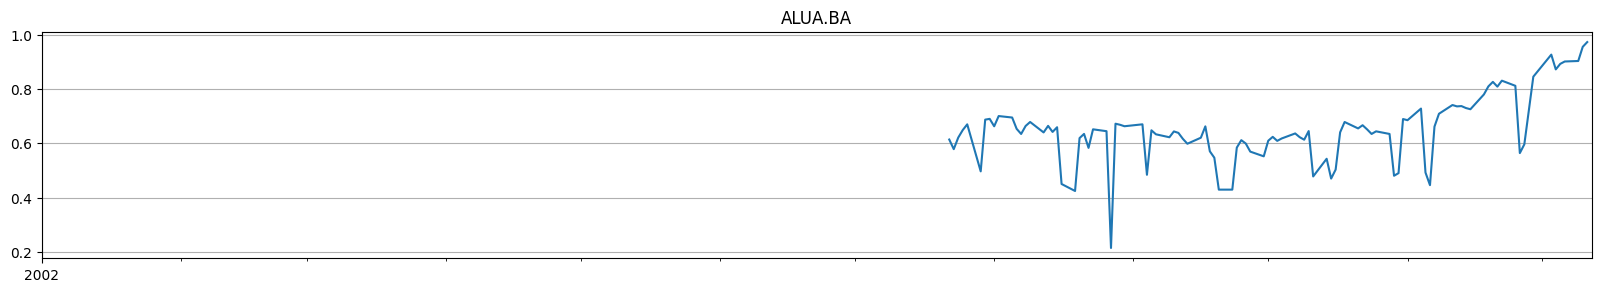

[*********************100%***********************]  1 of 1 completed


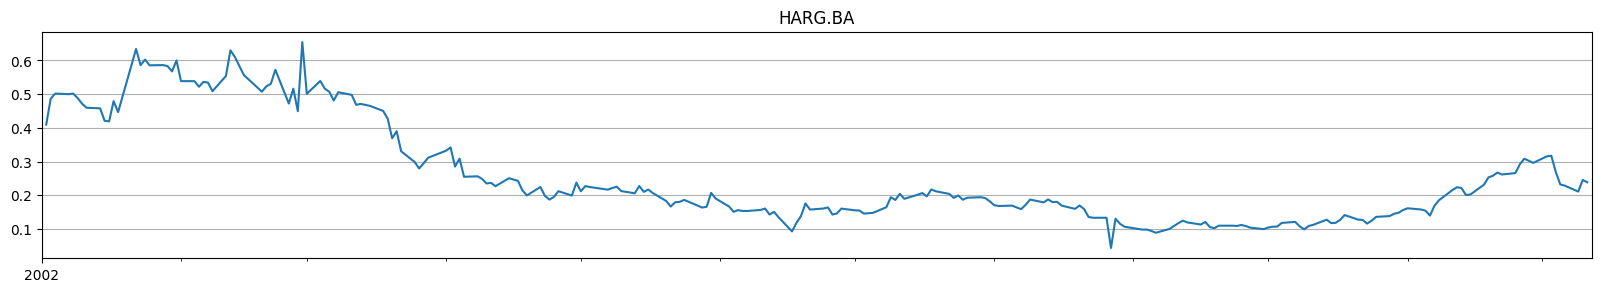

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LOMA.BA: Data doesn't exist for startDate = 1009843200, endDate = 1039651200
[*********************100%***********************]  1 of 1 completed


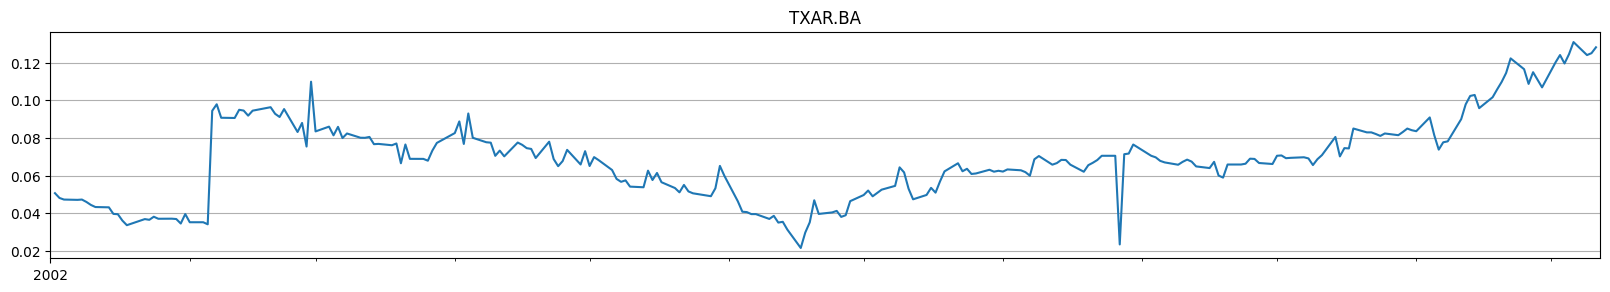

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- EDN.BA: Data doesn't exist for startDate = 1009843200, endDate = 1039651200
[*********************100%***********************]  1 of 1 completed


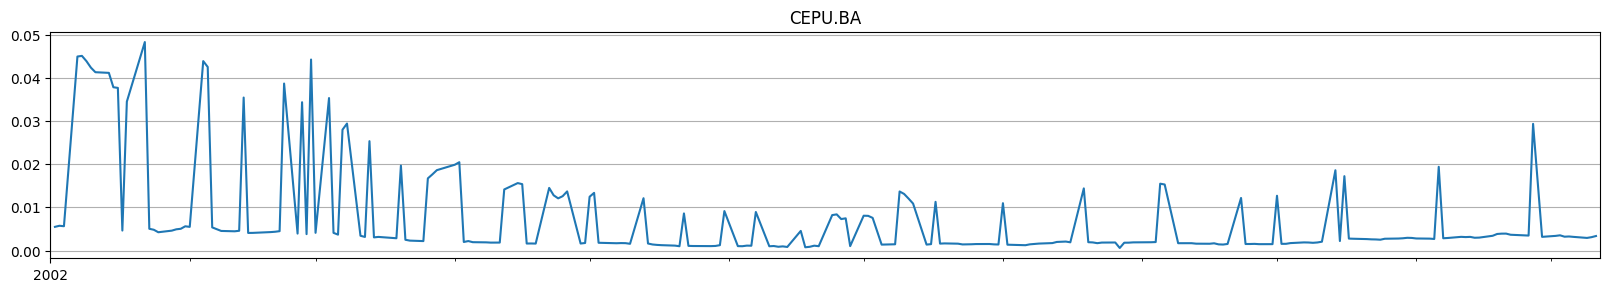

[*********************100%***********************]  1 of 1 completed


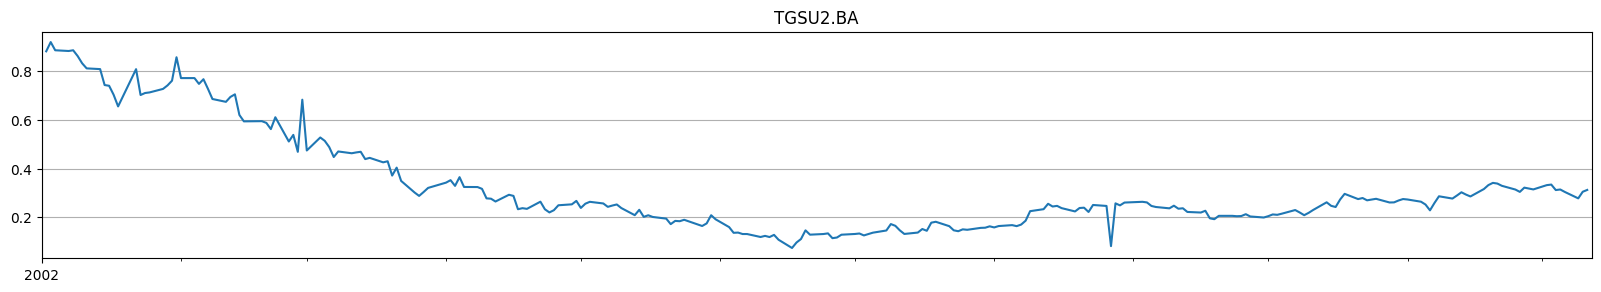

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TGNO4.BA: Data doesn't exist for startDate = 1009843200, endDate = 1039651200
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PAMP.BA: Data doesn't exist for startDate = 1009843200, endDate = 1039651200
[*********************100%***********************]  1 of 1 completed


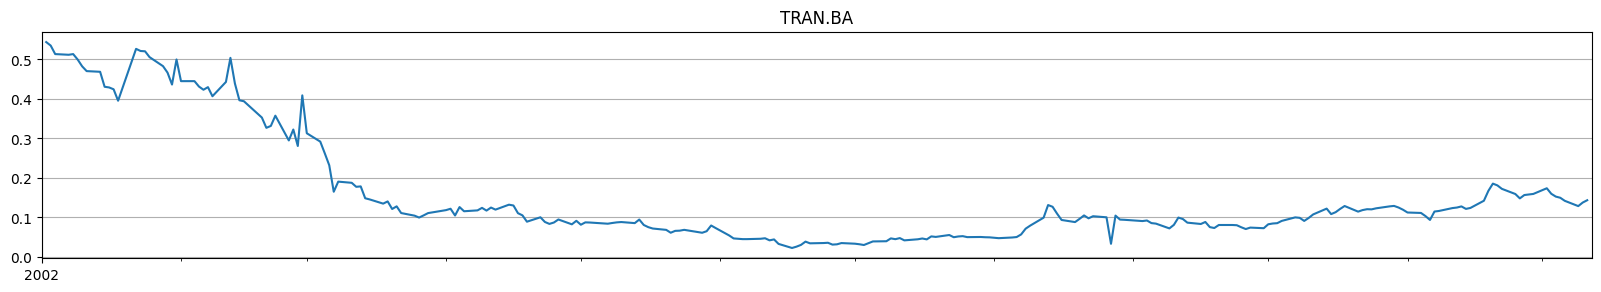

[*********************100%***********************]  1 of 1 completed


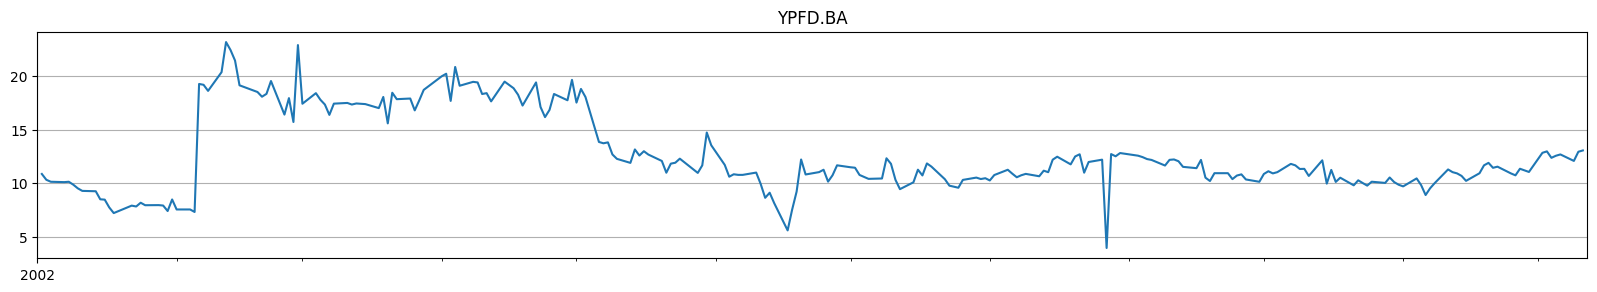

In [26]:
panel_lider = ["^MERV",
               "GGAL.BA", "BBAR.BA", "BMA.BA", "SUPV.BA", "BYMA.BA", "VALO.BA",
               "CVH.BA", "TECO2.BA", "MIRG.BA", "COME.BA",
               "CRES.BA",
               "ALUA.BA", "HARG.BA", "LOMA.BA", "TXAR.BA",  
               "EDN.BA", "CEPU.BA", "TGSU2.BA", "TGNO4.BA", "PAMP.BA", "TRAN.BA", "YPFD.BA"]
#panel_lider = ["ALUA.BA"]
for t in panel_lider:
  plot_ticker(t)